## Prediction using Decision Tree Algorithm

A decision tree, as the term suggests, uses a tree-like model to make predictions. It resembles an upside-down tree and uses a similar process that you do to make decisions in real life, i.e., by asking a series of questions to arrive at a decision. A decision tree splits data into multiple sets of data. Each of these sets is then further split into subsets to arrive at a decision.



### Utkal Kumar Sahoo


In [27]:
# Importing libraries in Python
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Loading the iris dataset
iris_data=pd.read_csv('Iris.csv',index_col=0)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris_data.shape

(150, 5)

In [7]:
# Checking for any Null values
iris_data.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualisation 

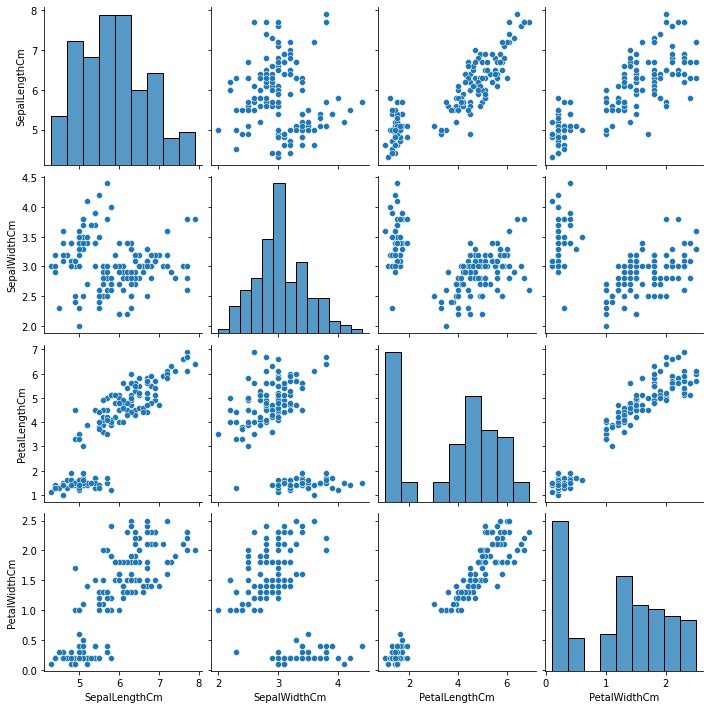

In [8]:
sns.pairplot(iris_data)

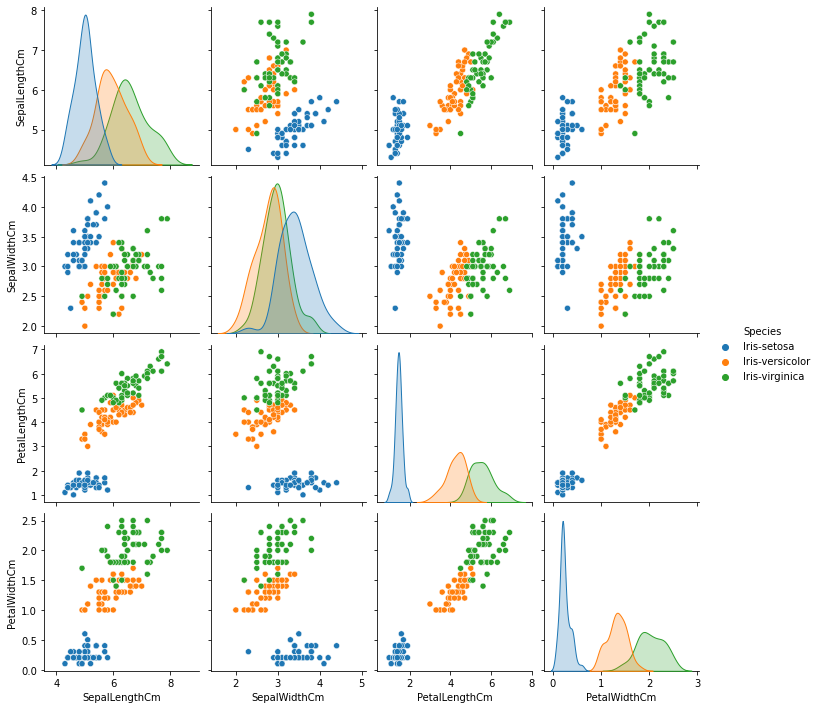

In [9]:
sns.pairplot(iris_data, hue='Species')


## Correlation Matrix 

In [10]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


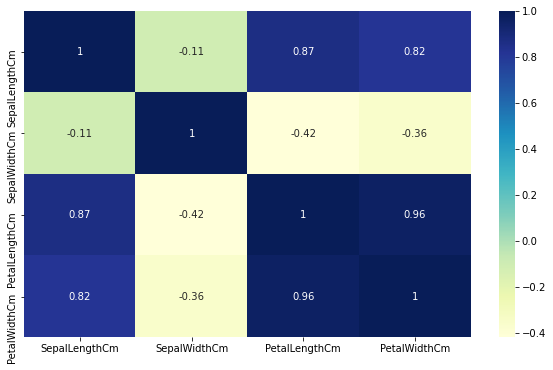

In [11]:
plt.figure(figsize = (10, 6))
sns.heatmap(iris_data.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Data Preparation

In [16]:
target=iris_data['Species']
df=iris_data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 4)

In [18]:
#defingi the attributes and labels
X=iris_data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
iris_data['Species']=le.fit_transform(iris_data['Species'])
y=iris_data['Species'].values
iris_data.shape


(150, 5)

## Training the Model

In [19]:
#Splitting data into train and test sets 7:3 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Trainging split:",X_train.shape)
print("Testing spllit:",X_test.shape)

Trainging split: (105, 4)
Testing spllit: (45, 4)


In [20]:
#Fitting the data to our decision tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


## Creating confusion matrix and Classification report

In [21]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [22]:
#checking the accuracy of the model
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


The accuracy of the model 1 or 100%

In [23]:
#confusion matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

## Visualization of decision Tree



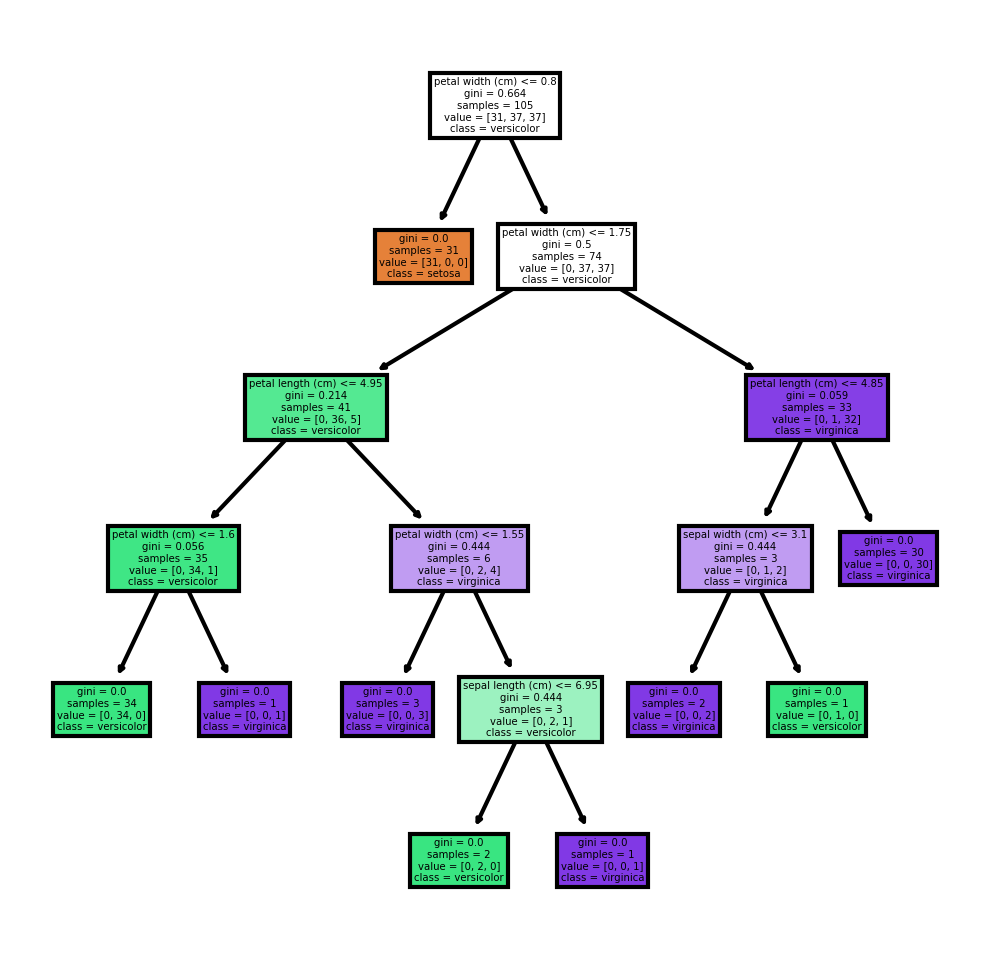

In [26]:
#visualizing the graph
from sklearn import tree
a=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree, feature_names = a, class_names = b, filled = True);

### Conclusion 

The decision tree predict the result with an accury of 100%

### Thank You
